**Ex7.	Design and implement a neural network to realize different logic gates (XNOR, NAND, XOR, etc.) and implement a back-propagation algorithm for tuning the weights of a neural network.** 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
def initParam(inputFeatures, neurons, outputFeatures):
  w1 = np.random.randn(neurons,inputFeatures)
  w2 = np.random.randn(outputFeatures, neurons)
  b1 = np.zeros((neurons,1))
  b2 = np.zeros((outputFeatures))

  parameters = {"W1" : w1, "b1" : b1,
                "W2" : w2, "b2" : b2}
  return parameters

              


In [ ]:
def forwardProp(X, y, param):
  m = X.shape[1]
  W1 = param["W1"]
  W2 = param["W2"]
  b1 = param["b1"]
  b2 = param["b2"]

  Z1 = np.dot(W1, X) + b1
  A1 = sigmoid(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)

  cache =  (Z1, A1, W1,b1, Z2, A2, W2, b2)
  logprobs = np.multiply(np.log(A1), Y) + np.multiply(np.log(1 - A2), (1 - Y))
  cost = -np.sum(logprobs) / m
  return cost, cache, A2

In [ ]:
def BackProp(X, Y, cache):
  m = X.shape[1]
  (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache

  dZ2 = A2 - Y
  dW2 = np.dot(dZ2, A1.T) / m
  db2 = np.sum(dZ2, axis = 1, keepdims = True)
    
  dA1 = np.dot(W2.T, dZ2)
  dZ1 = np.multiply(dA1, A1 * (1- A1))
  dW1 = np.dot(dZ1, X.T) / m
  db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
    
  gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                "dZ1": dZ1, "dW1": dW1, "db1": db1}
  return gradients


In [ ]:
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

AND 

In [ ]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output

OR

In [ ]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # OR input
Y = np.array([[0, 1, 1, 1]]) # OR output

NAND

In [ ]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # NAND input
Y = np.array([[1, 1, 1, 0]]) # NAND output

NOR

In [ ]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # NOR input
Y = np.array([[1, 1, 0, 0]]) # NOR output

In [ ]:
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initParam(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardProp(X, Y, parameters)
    gradients = BackProp(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)


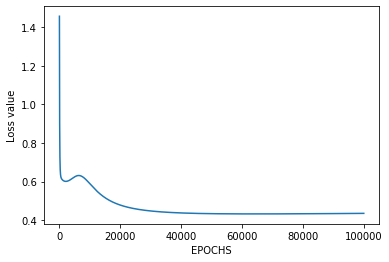

In [ ]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()


In [ ]:
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input
cost, _, A2 = forwardProp(X, Y, parameters)
print(A2)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

[[3.95265898e-03 9.91844024e-01 2.79035418e-04 4.17611409e-03]]
[[0. 1. 0. 0.]]
